In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import lightkurve as lk
from astropy.timeseries import LombScargle

def show_periodogram_and_lc(time, flux, flux_raw, minimum_period=1, maximum_period=100, bin_dt=5):
    poly = np.polyfit(time,flux, deg=2)
    y_red = np.polyval(poly, time)
    flux_normalized = flux/y_red
    ls = LombScargle(time, flux_normalized, np.std(flux_normalized)) 
    freq, power = ls.autopower()
    fap = ls.false_alarm_probability(power)
    #fap = ls.false_alarm_probability(power, method='bootstrap')
    plt.plot(1/freq, fap)
    plt.xlim(minimum_period, maximum_period)
    plt.xscale("log")
    plt.yscale("log")
    plt.show()
    
    lc = lk.LightCurve(data=None, time=time, flux=  flux_normalized, flux_err=None)
    pg = lc.to_periodogram(minimum_period=minimum_period, maximum_period=maximum_period)
    period = pg.period_at_max_power
    print(period)
    pg.plot(view='period') ;
    plt.xscale("log")
    plt.show()
    lc_bin = lc.bin(bin_dt)
    fig=plt.figure(figsize = (14, 7))
    plt.plot(lc.time.value, flux_raw/np.median(flux_raw), label="raw")
    plt.plot(lc.time.value, lc.flux.value, label = "pca 1s")
    plt.plot(lc_bin.time.value, lc_bin.flux.value,label ="pca %ds" % bin_dt)
    plt.xlabel("Time [s]", fontsize  = 23)
    plt.ylabel("flux", fontsize  = 23)
    plt.legend(fontsize = 15)
    plt.show()
    
bin_dt= 30
r_ap = 25 ## choose from 10, 15, 20, 25
n_comp_sub = 2
obs_date = "20220112" ## 20211014, 20211015, 20220111, 20220112, 20220113, 20220114, 20220524, 
band = "g_band" ## g_band, r_band, z_band
out_dir = "/alps/south/reduced/%s_analyzed/movies/*/%s" % (obs_date, band)
names = glob.glob(out_dir + "*")

/alps/south/reduced/20220112_analyzed/movies/WD_new31/g_band
366784816895496064


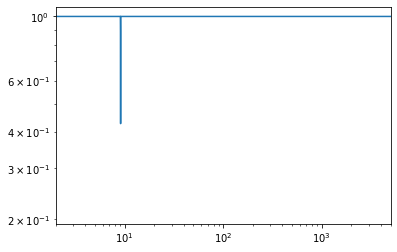

9.106683774513865 d


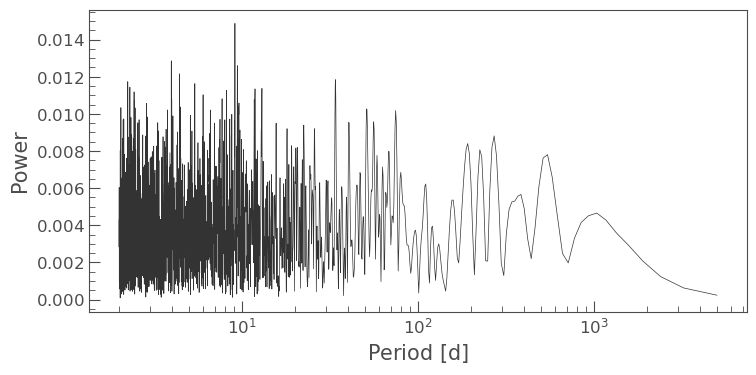

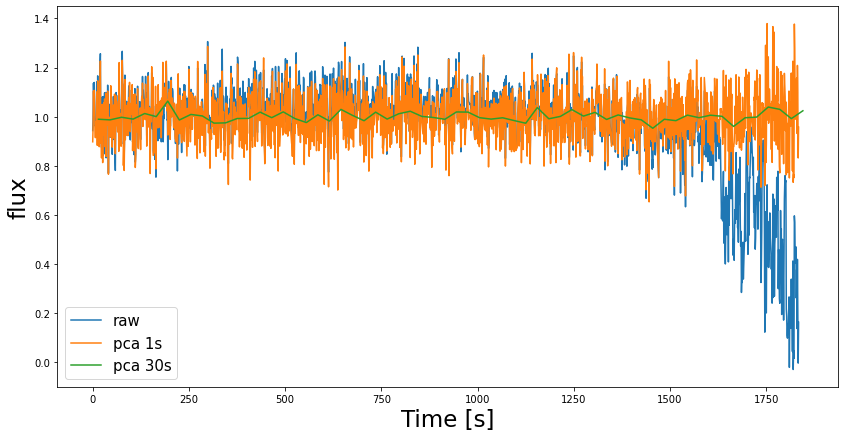

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


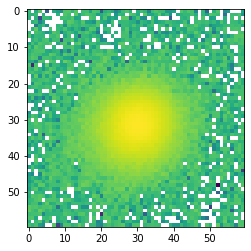

/alps/south/reduced/20220112_analyzed/movies/WD_triccs22/g_band
3014049448078210304


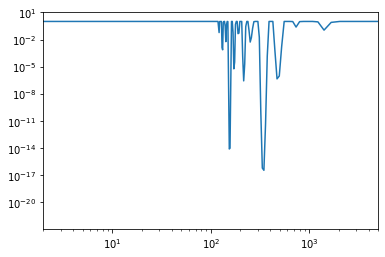

341.8670158543108 d


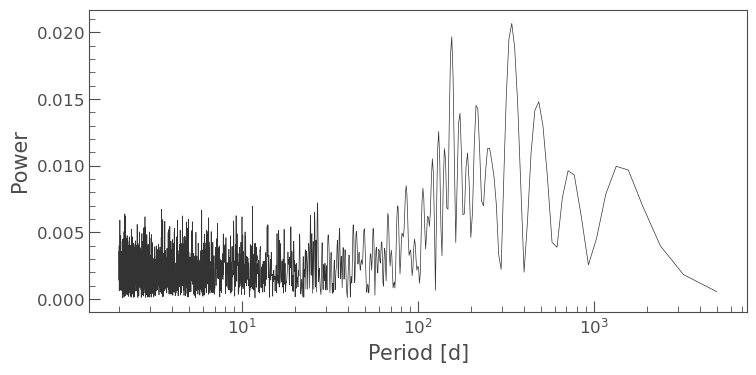

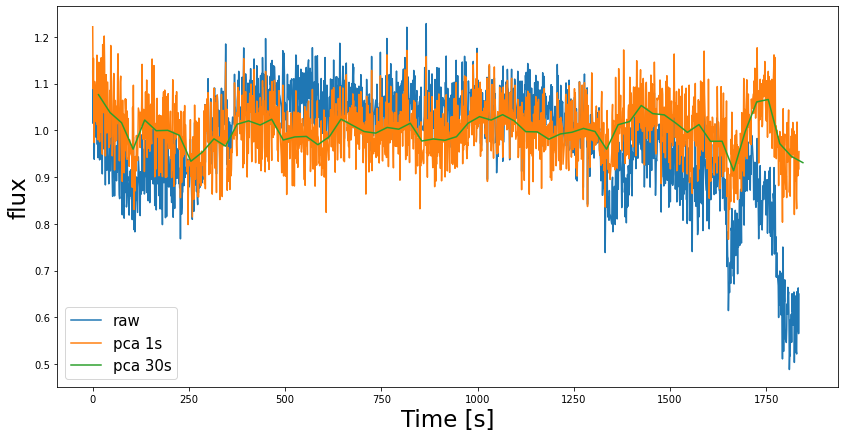

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


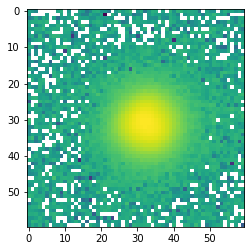

/alps/south/reduced/20220112_analyzed/movies/WD_triccs25/g_band
3251244858154433536


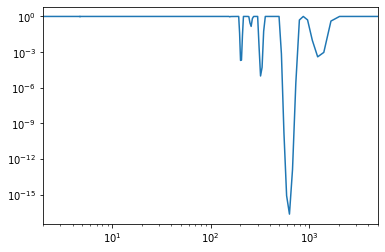

618.1104743443664 d


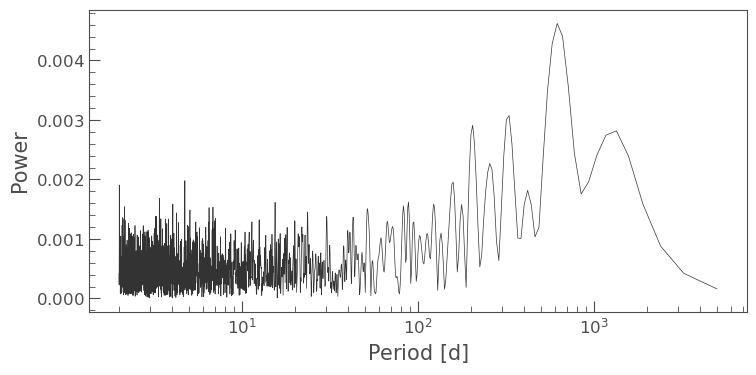

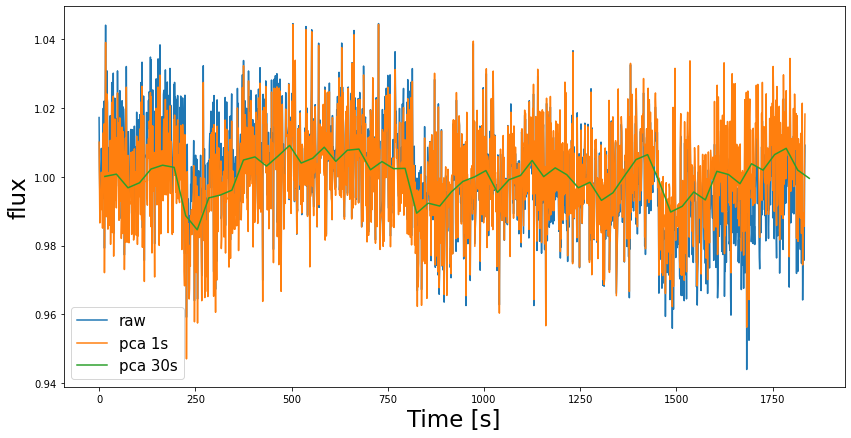

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


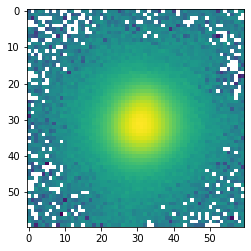

/alps/south/reduced/20220112_analyzed/movies/WD_triccs23/g_band
3201709827802584576


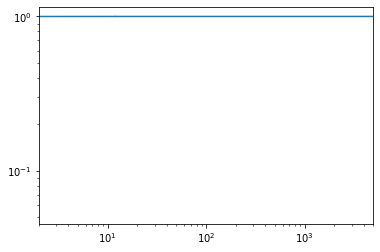

11.926363213799359 d


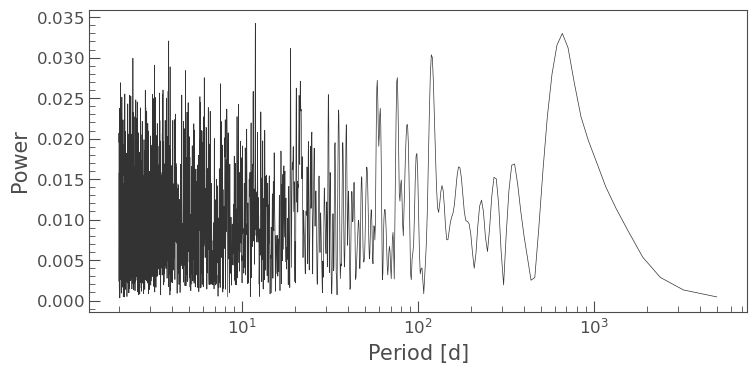

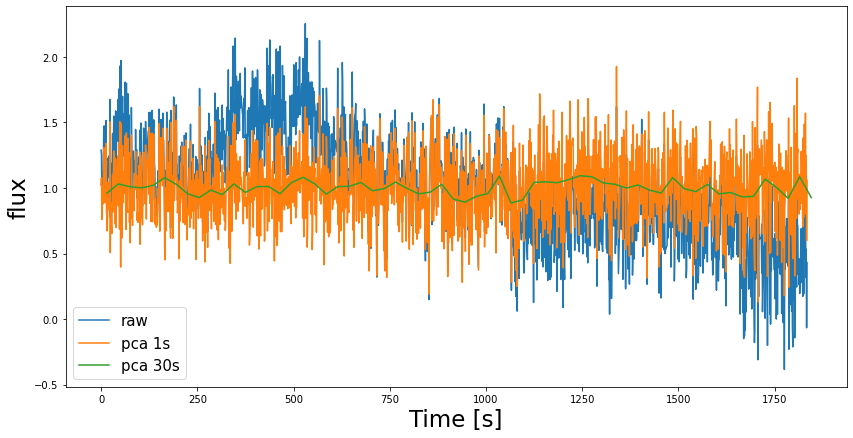

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


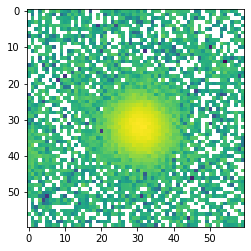

/alps/south/reduced/20220112_analyzed/movies/WD_new30/g_band
2529337507976700928


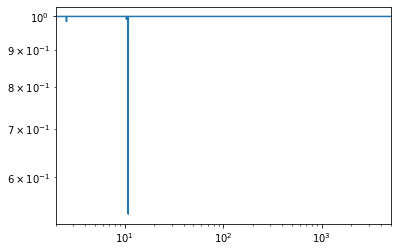

10.882553397631783 d


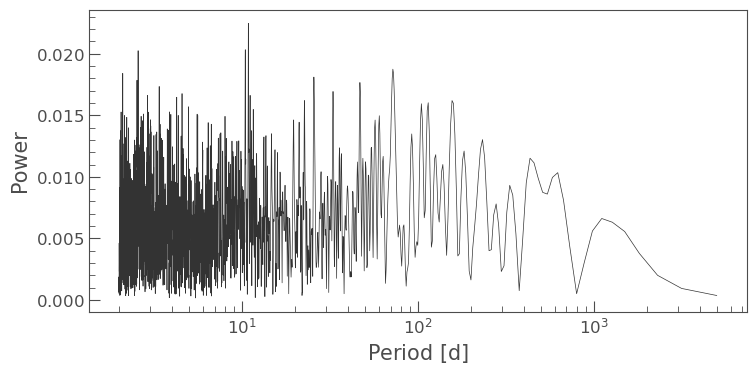

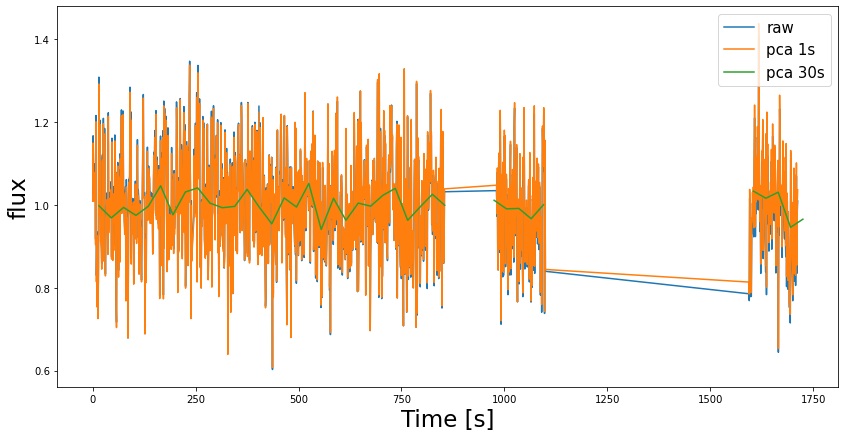

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


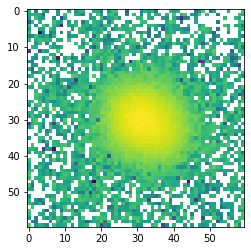

/alps/south/reduced/20220112_analyzed/movies/WD_new0/g_band
2448933731627261824


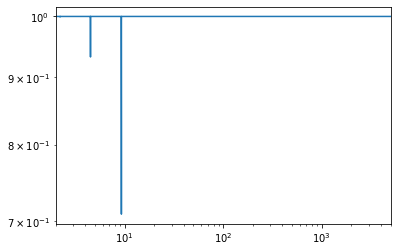

9.276466943994091 d


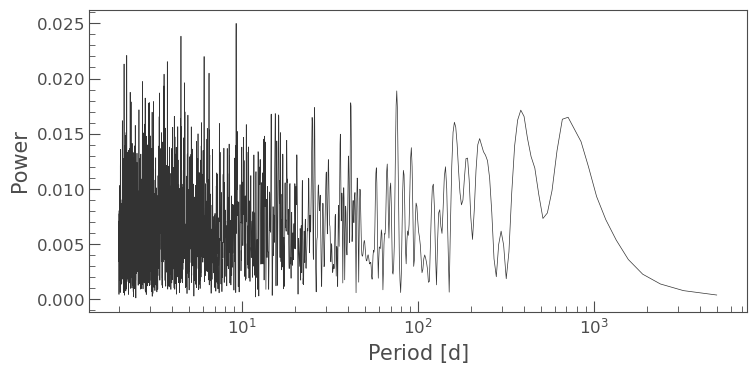

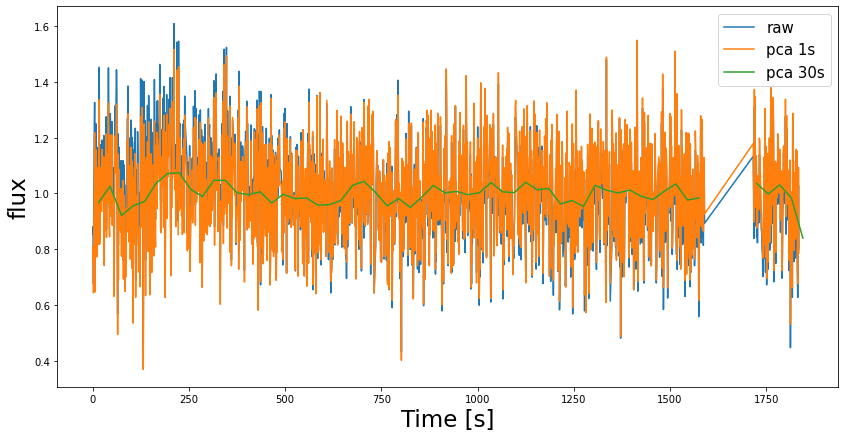

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


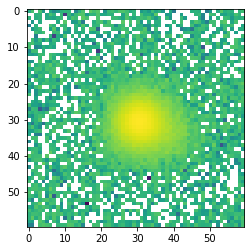

/alps/south/reduced/20220112_analyzed/movies/WD_new29/g_band
308383019835259008


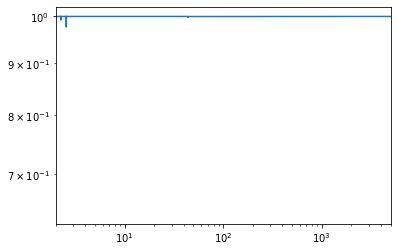

2.248901769358567 d


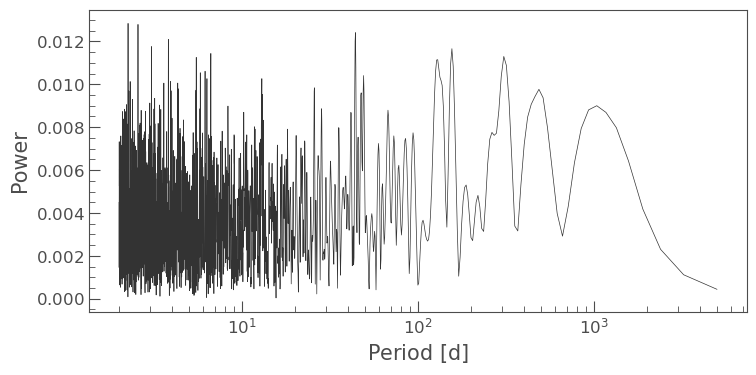

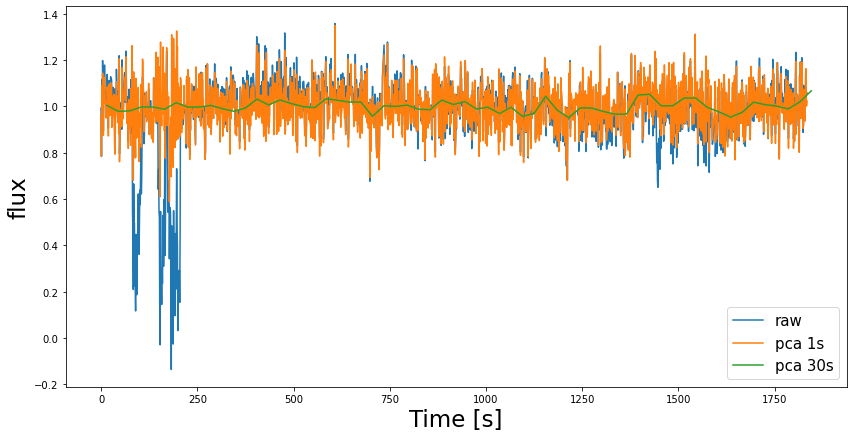

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


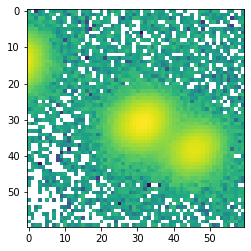

/alps/south/reduced/20220112_analyzed/movies/WD_triccs31/g_band
384841336150015360


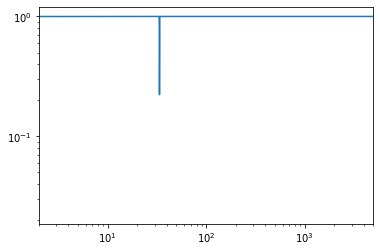

33.60246277598354 d


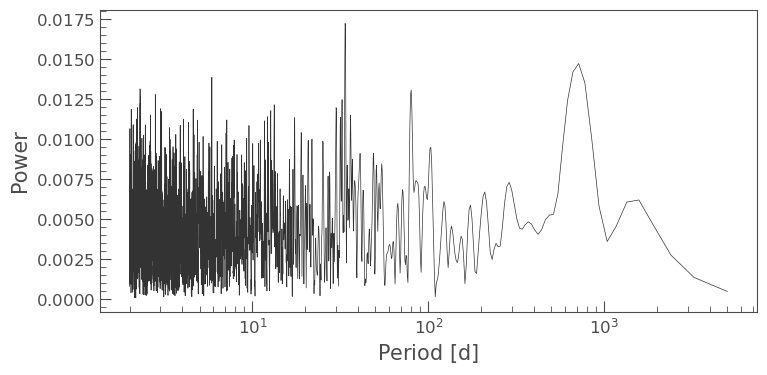

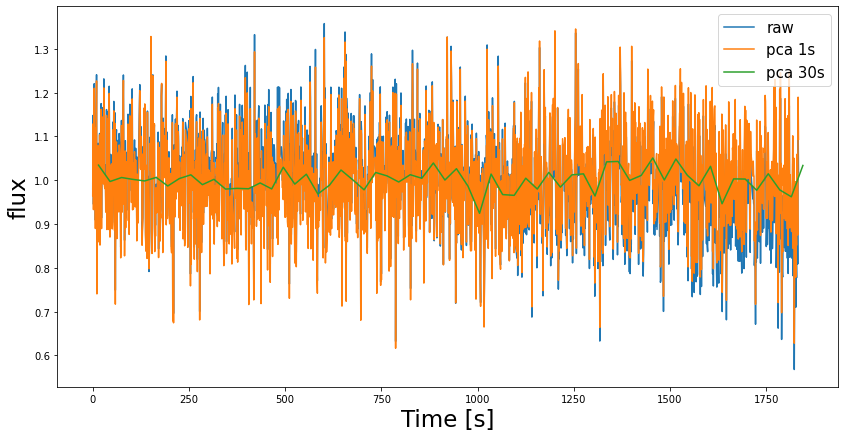

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


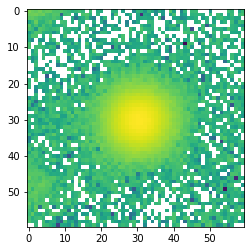

/alps/south/reduced/20220112_analyzed/movies/WD_triccs30/g_band
/alps/south/reduced/20220112_analyzed/movies/WD_triccs24/g_band
3273625554777257472


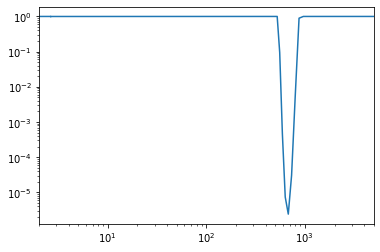

662.8865130601084 d


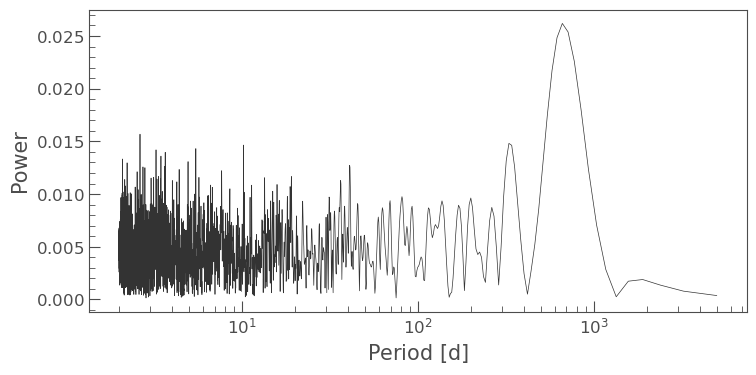

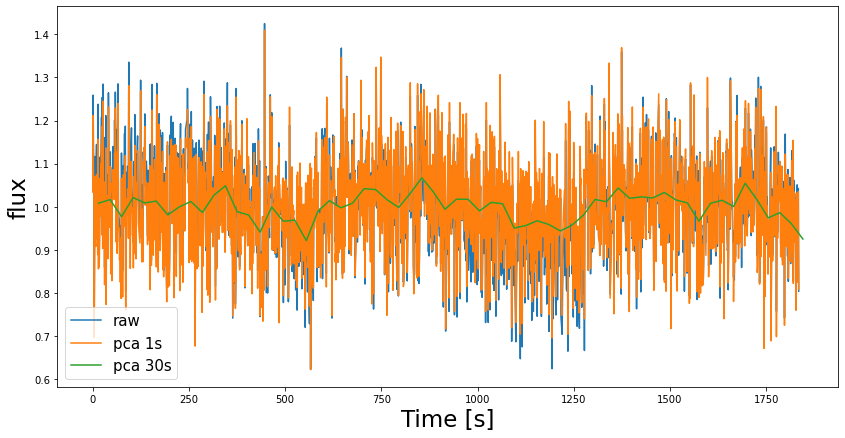

<ipython-input-16-729f1f4e41eb>:17: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.sum(movie, axis=0)))


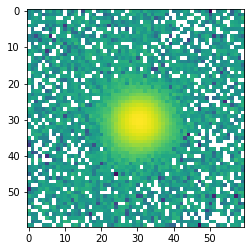

In [16]:
for name in names:
    files = sorted(glob.glob(name + "/target_processed_*_lc%d.npz" % r_ap))
    raw_files = sorted(glob.glob(name + "/target_and_others_*_lc%d.npz" % r_ap))
    print(name)
    for (i, file) in enumerate(files):
        gaia_id= file.split("_")[-2]
        print(gaia_id)
        data = np.load(file)
        data_raw = np.load(raw_files[i])
        time_target = data["time"]
        flux_target_pca = data["lc_pca"][n_comp_sub-1]
        flux_least = data["lc_least_var"]
        flux_target_raw = data_raw["flux_target"]
        show_periodogram_and_lc(time_target - np.min(time_target), flux_target_pca, flux_target_raw , maximum_period=5000, minimum_period=2, bin_dt = bin_dt )  
        d_movie = np.load(name+ "/movie_after_bkgsub_%s.npz" % gaia_id)
        movie= d_movie["movie"]
        plt.imshow(np.log10(np.sum(movie, axis=0)))
        plt.show()